---

ФИО: Рафф Антон Станиславович

Группа: БЭК 216

id из контеста: dap_econ_2022_254

Факт о себе: прыгал с парашютом 

---

Импортируем библиотеки и зададим начальные настройки для зерна генераторов случайных чисел:

In [ ]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

%matplotlib inline

SEED = 2023

# Задача 1. Парадокс инспектора.

Зададим число экспериментов ```N```, временной интервал ```TIME_INTERVAL``` в минутах (от 08:00 до 20:00), интервалы между автобусами ```INTERVALS```:

In [ ]:
N = 10**4
TIME_INTERVAL = (20-8)*60
INTERVALS = [5, 10]
TIME_START = datetime(2023,1,1,8,0)
TIME_END = datetime(2023,1,1,20,0,0)

Проведём $N$ экспериментов, циклически проверяя, достаточно ли времени для отправления следующего автобуса, после чего будем добавлять число отошедших в эксперименте автобусов в список ```buses```. Также будем сохранять число пассажиров в автобусах и проверять условие для Пумбы (для заданий б и в):

In [ ]:
random.seed = SEED
buses = []
timons_buses = []
pumbas_buses = []

for i in range(N):
  time = TIME_START
  buses_left = 0
  passengers_per_bus = []
  pumbas_time = TIME_START + timedelta(minutes=random.uniform(0, TIME_INTERVAL))
  pumba_ride = False

  while True:
    bus_interval = timedelta(minutes=random.choice(INTERVALS))
    if time + bus_interval <= TIME_END:
      time += bus_interval
      buses_left += 1
      passengers = bus_interval.seconds//60
      passengers_per_bus.append(passengers)
      
      if not pumba_ride and time > pumbas_time:
        pumbas_buses.append(passengers)
        pumba_ride = True
    else:
      break

  buses.append(buses_left)
  timons_buses.append(random.choice(passengers_per_bus))

Построим гистограмму количества автобусов, отошедших от автостанции за сутки:

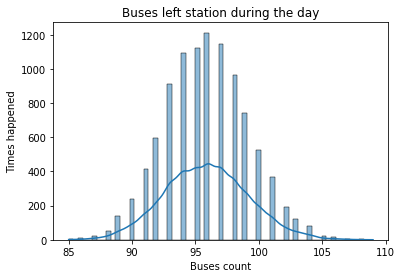

In [ ]:
ax = sns.histplot(data=buses, kde=True)
ax.set(xlabel="Buses count", ylabel="Times happened", title="Buses left station during the day")
plt.show()

Видно, что визуально данное распределение похоже на нормальное своей колоколообразной формой  (пункт а).

Построим гистограмму числа пассажиров на случайном автобусе, на котором едет Тимон, в каждом из экспериментов, а также найдём мат. ожидание и дисперсию (пункт б):

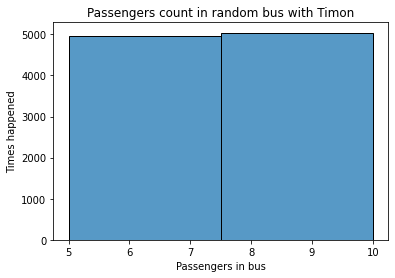

Mean: 7.52, variance: 6.249600000000001 (for Timon)


In [ ]:
ax = sns.histplot(data=timons_buses, bins=2)
ax.set(xlabel="Passengers in bus", ylabel="Times happened", title="Passengers count in random bus with Timon")
plt.show()
print(f'Mean: {np.mean(timons_buses)}, variance: {np.var(timons_buses)} (for Timon)')

На гистограмме два столбика с примерным равными высотами, т.е. примерно равным числом исходов, т.к. есть всего два дискретных равновероятных значения интервалов между автобусами.

Построим гистограмму числа пассажиров на случайном автобусе, на котором едет Пумба, в каждом из экспериментов, а также найдём мат. ожидание и дисперсию (пункт в):

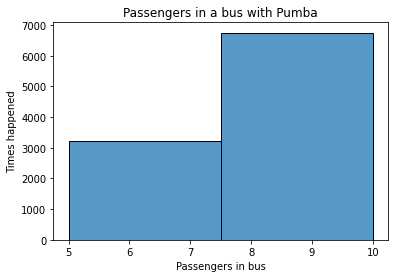

Mean: 8.380408653846153, variance: 5.474880602232802 (for Pumba)


In [ ]:
ax = sns.histplot(data=pumbas_buses, bins=2)
ax.set(xlabel="Passengers in bus", ylabel="Times happened", title="Passengers in a bus with Pumba")
plt.show()
print(f'Mean: {np.mean(pumbas_buses)}, variance: {np.var(pumbas_buses)} (for Pumba)')

На данной гистограмме снова два столбца из-за всего двух возможных интервалов для автобуса, но при этом заметно, что в примерно в 1/3 экспериментов случаев в автобусе 5 пассажиров, а в 2/3 - 10 пассажиров.

Пусть теперь распределение интервалов между автобусами экспоненциальное со средним интервалом в 10 минут. Найдём ответы на те же вопросы (пункт г; отличие в коде есть только в том, как определяется ```bus_interval```):

In [ ]:
random.seed = SEED
BETA = 10
LAMBDA = 1 / BETA
buses = []
timons_buses = []
pumbas_buses = []

for i in range(N):
  time = TIME_START
  buses_left = 0
  passengers_per_bus = []
  pumbas_time = TIME_START + timedelta(minutes=random.uniform(0, TIME_INTERVAL))
  pumba_ride = False

  while True:
    bus_interval = timedelta(minutes=random.expovariate(LAMBDA))
    if time + bus_interval <= TIME_END:
      time += bus_interval
      buses_left += 1
      passengers = bus_interval.seconds//60
      passengers_per_bus.append(passengers)
      
      if not pumba_ride and time > pumbas_time:
        pumbas_buses.append(bus_interval.seconds//60)
        pumba_ride = True
    else:
      break

  buses.append(buses_left)
  timons_buses.append(random.choice(passengers_per_bus))

Построим гистограмму количества автобусов, отошедших от автостанции за сутки:

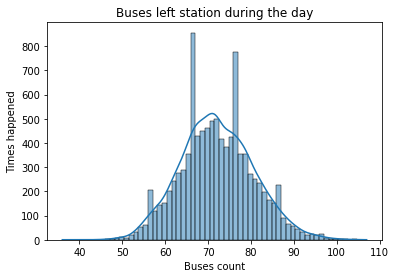

In [ ]:
ax = sns.histplot(data=buses, kde=True)
ax.set(xlabel="Buses count", ylabel="Times happened", title="Buses left station during the day")
plt.show()

Видно, что визуально данное распределение снова похоже на нормальное своей колоколообразной формой  (пункт а).

Построим гистограмму числа пассажиров на случайном автобусе, в который приходит Тимон, в каждом из экспериментов, а также найдём мат. ожидание и дисперсию (пункт б):

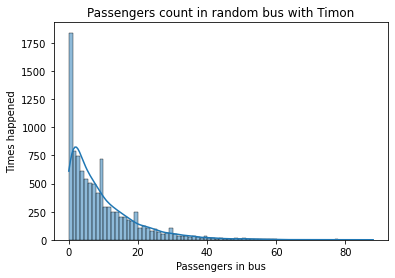

Mean: 9.5589, variance: 102.81953078999999 (for Timon)


In [ ]:
ax = sns.histplot(data=timons_buses, kde=True)
ax.set(xlabel="Passengers in bus", ylabel="Times happened", title="Passengers count in random bus with Timon")
plt.show()
print(f'Mean: {np.mean(timons_buses)}, variance: {np.var(timons_buses)} (for Timon)')

Данная гистограмма визуально напоминает экспоненциальное распределение, что логично, т.к. постановка задачи соответствует пуассоновкому потоку автобусов.

Построим гистограмму числа пассажиров на случайном автобусе, в который приходит Пумба, в каждом из экспериментов, а также найдём мат. ожидание и дисперсию (пункт в):

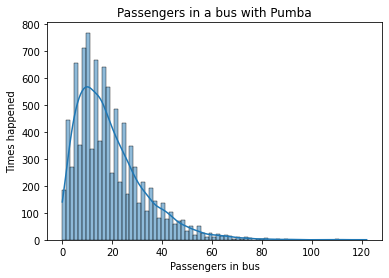

Mean: 19.152037299817554, variance: 190.1848716856146 (for Pumba)


In [ ]:
ax = sns.histplot(data=pumbas_buses, kde=True)
ax.set(xlabel="Passengers in bus", ylabel="Times happened", title="Passengers in a bus with Pumba")
plt.show()  
print(f'Mean: {np.mean(pumbas_buses)}, variance: {np.var(pumbas_buses)} (for Pumba)')

Визуально распределение на данной гистограмме напоминает распределение Эрланга или $\chi^2$.

Парадокс заключается в отличиях между гистограммами для Тимона и Пумбы, т.к. кажется, что нет никакой разницы между тем, чтобы выбрать автобус (Тимон) и прийти в конкретное время и дождаться автобуса (Пумба). Его разрешение состоит в том, что для Тимона события уже случились, одно из которых он выбирает, а Пумба своим приходом и ожиданием создаёт условную вероятность, которая влияет на результат и создаёт отличие между ситуациями.

# Задача 2. Парадокс Хуана Мануэля Родригеса Паррондо.

Зададим число симуляций, число визитов в казино в каждой из симуляций, вероятность выиграть в казино А и вероятности выигрышей в казино Б:

In [ ]:
SIMULATIONS, VISITS = 10**4, 1000
p_A = 0.49
p_B1, p_B2 = 0.09, 0.74

Введём функции, которые определяют размер выигрыша или проигрыша в казино А и Б:

In [ ]:
def casino_A():
  random.seed = SEED
  return random.choices([1, -1], weights=[p_A, 1-p_A], k=1)[0]
  
def casino_B(money):
  random.seed = SEED
  if money % 3 == 0:
    winning = random.choices([1, -1], weights=[p_B1, 1-p_B1], k=1)[0]
  else:
    winning = random.choices([1, -1], weights=[p_B2, 1-p_B2], k=1)[0]
  return winning

Проведём симуляции, где каждый раз будет создаваться словарь, в котором будут храниться данные о богатстве Атоса, Портоса и Арамиса для каждого их визита в казино:

In [ ]:
random.seed = SEED
tracks = []

for _ in range(SIMULATIONS):
  track = {'Atos': [1000], 'Portos': [1000], 'Aramis': [1000]}
  
  for visit in range(1, VISITS+1):
    atos_money, portos_money, aramis_money = track['Atos'][visit-1], track['Portos'][visit-1], track['Aramis'][visit-1]
    casino = random.choice(['A', 'B'])
    
    aramis_win = casino_A() if casino == 'A' else casino_B(aramis_money)

    track['Atos'].append(atos_money+casino_A())
    track['Portos'].append(portos_money+casino_B(portos_money))
    track['Aramis'].append(aramis_money+aramis_win)
    
  tracks.append(track)

Теперь выделим из всех $N$ симуляций 10 случайных, откуда получим траектории случайного процесса, т.е. изменения богатства, каждого из героев; также сделаем усреднения по всем симуляциям размера богатства в каждый из визитов. Данные для удобства будем хранить в ```pandas.DataFrame```:

In [ ]:
random.seed = SEED
random_tracks = random.choices(tracks, k=10)

dfs = [pd.DataFrame(track) for track in random_tracks]
cols = [f'Track {i}' for i in range(1, 10+1)] + ['Mean']

atos_tracks = pd.DataFrame(columns=cols)
portos_tracks = pd.DataFrame(columns=cols)
aramis_tracks = pd.DataFrame(columns=cols)

for i in range(1, 10+1):
  df = dfs[i-1]
  atos_tracks[f'Track {i}'] = df['Atos']
  portos_tracks[f'Track {i}'] = df['Portos']
  aramis_tracks[f'Track {i}'] = df['Aramis']

atos_means, portos_means, aramis_means = [], [], []
for visit in range(0, VISITS+1):
  atos_money, portos_money, aramis_money = [], [], []
  for track in tracks:
    atos, portos, aramis = track['Atos'][visit], track['Portos'][visit], track['Aramis'][visit]
    atos_money.append(atos)
    portos_money.append(portos)
    aramis_money.append(aramis)
    
  atos_means.append(np.mean(atos_money))
  portos_means.append(np.mean(portos_money))
  aramis_means.append(np.mean(aramis_money))
  

atos_tracks['Mean'] = atos_means
portos_tracks['Mean'] = portos_means
aramis_tracks['Mean'] = aramis_means

Построим 10 случайных траекторий изменений богатства Атоса вместе с усреднённой по всем экспериментам траекторией изменения богатства (пункт а):

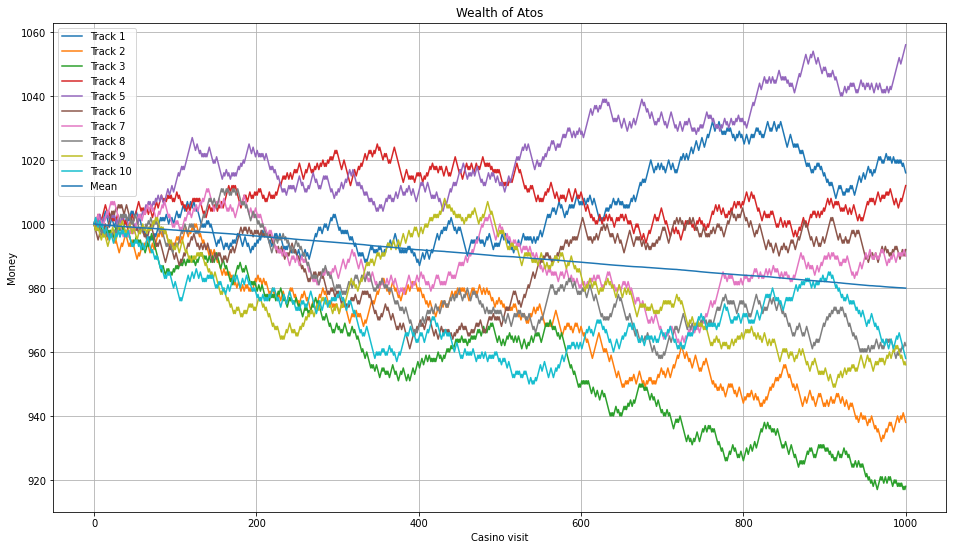

In [ ]:
atos_tracks.plot(title="Wealth of Atos", xlabel='Casino visit', ylabel='Money', figsize=(16, 9), grid=True);

По данным случайным траекториям видно, что стратегия Атоса невыгодная: в долгосрочной перспективе, то есть спустя большое число визитов казино, его богатство уменьшается, - также об этом говорит усреднённая по экспериментам величина богатства - она практически монотонно убывает. Это было ожидаемо, т.к. вероятность выигрыша меньше вероятности проигрыша, а мат. ожидание есть $1 \cdot p_A + (-1) \cdot (1-p_A) = 0.49 - 0.51 = -0.02$ (собственно, это и есть тангенс угла наклона траектории среднего).

Построим 10 случайных траекторий изменений богатства Портоса вместе с усреднённой по всем экспериментам траекторией изменения богатства (пункт б):

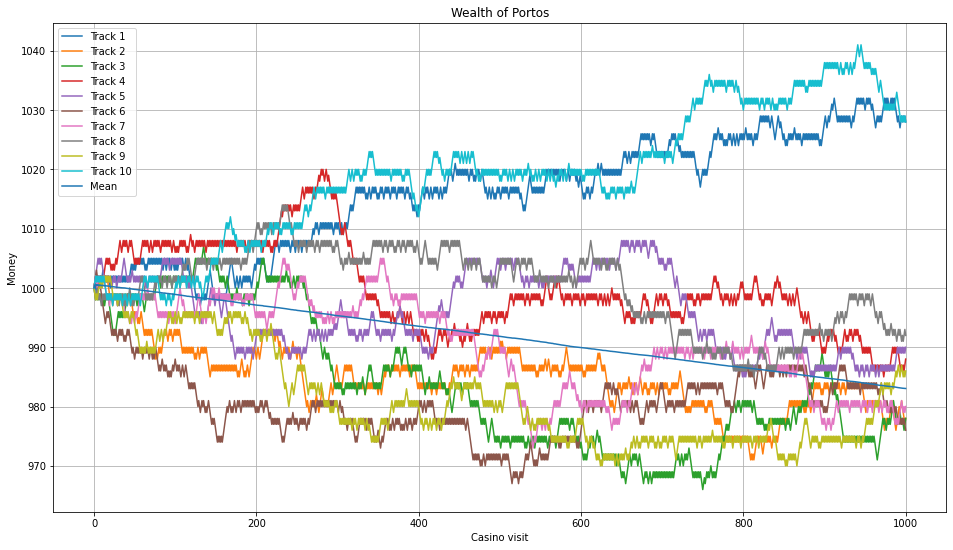

In [ ]:
portos_tracks.plot(title="Wealth of Portos", xlabel='Casino visit', ylabel='Money', figsize=(16, 9), grid=True);

По видам данных зависимостей можно сделать вывод, что стратегия Портоса в лучшем случае ничейная (колебания вокруг начального богатства), скорее даже проигрышная: траектории постепенно убывают, а усреднённая по экспериментам траектория богатства монотонно убывает, но слабее, чем а Атоса.

Построим 10 случайных траекторий изменений богатства Арамиса вместе с усреднённой по всем экспериментам траекторией изменения богатства (пункт в):

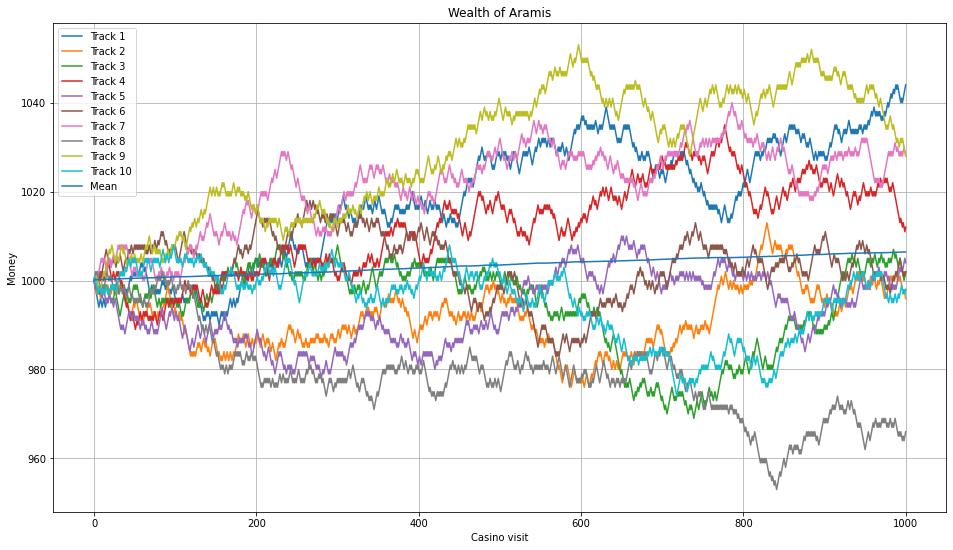

In [ ]:
aramis_tracks.plot(title="Wealth of Aramis", xlabel='Casino visit', ylabel='Money', figsize=(16, 9), grid=True);

По данным случайным траекториям видно, что стратегия Арамиса, которая является комбинацией стратегий Атос и Портоса, достаточно выгодная: в долгосрочной перспективе, то есть спустя большое число визитов казино, его богатство увеличивается, - также об этом говорит усреднённая по экспериментам величина богатства - она практически монотонно возрастает.

Парадокс заключается в том, что комбинация двух данных в среднем проигрышных стратегий есть в среднем выигрышная стратегия.

# Задача 3. Парадокс Берксона.

Зададим параметры нормального распределения (мат. ожидание и стандартное отклонение), число школьников, пределы и шаг изменения $n$:

In [ ]:
A, STDEV = 60, 10
N = 10**4
a, b, step = 80, 160, 5

Смоделируем для каждого $n$ результаты $N$ школьников по двум экзаменам в предположении о том, что они распределены по нормальному закону, данные о о результатах каждого экзамена баллов будем хранить в словарях с прошедшими и непрошедшими абитуриентами:

In [ ]:
random.seed = SEED
n_range = range(a, b+step, step)

passed, not_passed = {}, {}

for n in n_range:
  results_p, results_np = {}, {}
  russian_p, maths_p = [], []
  russian_np, maths_np = [], []

  for _ in range(N):
    russian = random.gauss(A, STDEV)
    maths = random.gauss(A, STDEV)
    total = russian + maths

    if total > n:
      russian_p.append(russian)
      maths_p.append(maths)
    else:
      russian_np.append(russian)
      maths_np.append(maths)

  results_p['Russian'] = russian_p
  results_p['Maths'] = maths_p
  passed[n] = results_p

  results_np['Russian'] = russian_np
  results_np['Maths'] = maths_np
  not_passed[n] = results_np

Построим график зависимости числа прошедших в УШЭ школьников для каждого $n$ (пункт а):

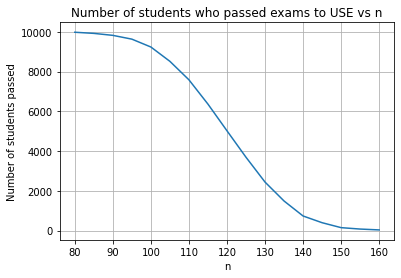

In [ ]:
num_passed = [len(passed[n]['Russian']) for n in n_range]

fig, ax = plt.subplots()

ax.plot(n_range, num_passed, "-")

ax.set_xlabel("n")
ax.set_ylabel("Number of students passed")
plt.title("Number of students who passed exams to USE vs n")
plt.grid()
plt.show()

Как мы видим, график числа прошедших в УШЭ соответствует нормальному распределению (правой ветви), т.к. если с.в. $\eta = 2\xi$, где $\xi \sim \mathcal{N}(a, \sigma^2$), то $\eta \sim \mathcal{N}(2a, 2\sigma^2)$, что можно доказать через формулу для $\eta = h(\xi)$ либо через вычисление свёртки $f_\eta(x) = \int\limits_{-\infty}^{+\infty} f_{\mathcal{N}(a, \sigma^2)} (t) \cdot f_{\mathcal{N}(a, \sigma^2)} (x-t) \ \mathrm{d} t $.

Построим график выборочной корреляции между результатами по русскому языку и математике в зависимости от $n$ среди прошедших в УШЭ (пункт б):

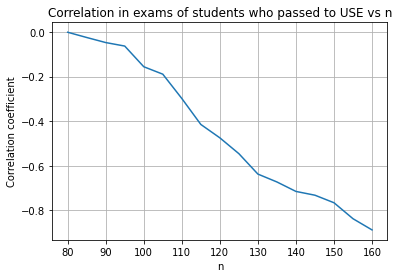

In [ ]:
corr = []

for n in n_range:
  df = pd.DataFrame(passed[n])
  corr.append(df.corr()['Russian']['Maths'])

fig, ax = plt.subplots()

ax.plot(n_range, corr, "-")

ax.set_xlabel("n")
ax.set_ylabel("Correlation coefficient")
plt.title("Correlation in exams of students who passed to USE vs n")
plt.grid()
plt.show()

Как видно из графика, с ростом проходного балла коэффициент корреляции убывает от 0, т.е. из абсолютно некоррелированного состояния (при заданных параметрах легко пройти этот порог), до практически -1, т.е. до сильного отрицательно коррелированного, что значит, что баллы должны возрастать и всё меньше отличаться друг от друга. Это напрямую следует из вида нормального распределения: куда проще набрать суммарно больший балл, уделяя внимание двум экзаменам, чем отдавая приоритет какому-то одному, т.к. вероятность получить результат по одному экзамену сильно выше, чем по другому, с ростом балла экспоненциально убывает. 

Построим график выборочной корреляции между результатами по русскому языку и математике в зависимости от $n$ среди непрошедших в УШЭ (пункт в):

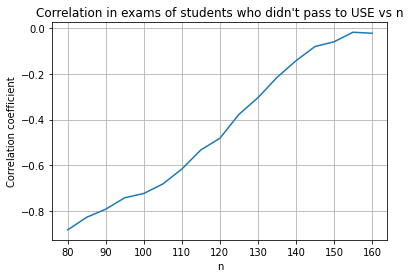

In [ ]:
corr = []

for n in n_range:
  df = pd.DataFrame(not_passed[n])
  corr.append(df.corr()['Russian']['Maths'])

fig, ax = plt.subplots()

ax.plot(n_range, corr, "-")

ax.set_xlabel("n")
ax.set_ylabel("Correlation coefficient")
plt.title("Correlation in exams of students who didn't pass to USE vs n")
plt.grid()
plt.show()

Как видно из этого графика, корреляция между баллами по русскому языку и по математике для непрошедших в УШЭ ровно обратная: чем больше проходной балл, тем меньше абитуриентов могут его пройти.

Парадокс заключается в том, что нельзя говорить об общей корреляции между какими-то двумя признаками, рассматривая лишь выборки - для этого построим зависимость коэффициента корреляции между результатами по двум экзаменам всех школьников для каждого $n$:

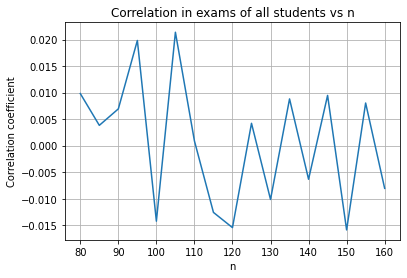

In [ ]:
corr = []

for n in n_range:
  df_p = pd.DataFrame(passed[n])
  df_n = pd.DataFrame(not_passed[n])
  df = pd.concat([df_p, df_n])
  corr.append(df.corr()['Russian']['Maths'])
  
fig, ax = plt.subplots()

ax.plot(n_range, corr, "-")

ax.set_xlabel("n")
ax.set_ylabel("Correlation coefficient")
plt.title("Correlation in exams of all students vs n")
plt.grid()
plt.show()

Как легко видеть, нельзя сделать никакого вывода о характере зависимости коэффициента корреляции от $n$.

# Бонус

Я начал свой февраль так:

In [ ]:
from IPython.display import Image

Image(url="https://i.kym-cdn.com/photos/images/original/002/205/305/eb5.gif")

Самой классной эмоцией, которую я испытывал за последний месяц, была ...